# Colab settings

## drive mount
여러분들의 구글 드라이브와 코랩을 연동시켜 줍니다.

In [12]:
from google.colab import drive
drive.mount('/content/drive')
#구글 로그인을 요구합니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 코딩하다가 접게 만드는 요인 대충 3위 = 경로 설정
코딩 첨하다가 "아니 파일 있는데 왜 안된다는 거야??

or 자꾸 경로 관련 에러 발생
--> 파티하는데 위치를 안알려줌과 동일

굳이 비유를 하자면, 친구 이썬이와 홈파티를 하기러 했는데 불러도 대답이 없음

(경로가 문제였다면) 이썬이에게 홈파티 하자고 해놓고 집 주소를 안알려 준셈.

코딩이나 프로그램이 주는 만능적이라는 환상 때문에, 내가 주소를 안알려주고 안된다고 실망 한 것과 같습니다.

밑에서 경로가 맞는지 확인해줍시다.

In [10]:
import os # os 모듈을 import합니다. 이 모듈은 운영 체제와 상호 작용하기 위한 다양한 함수를 제공합니다.

# 현재 작업 디렉토리를 출력합니다.
print(os.getcwd())

# 결과값 = 현재 이썬이가 알고 있는 홈파티 주소

/content


In [11]:
# 제대로 된 파티 주소를 할당해줘야함
# 1.본인이 업로드한 데이터와 py 파일이 있는 곳을 좌측 폴더에서 찾기
# 2.해당 폴더 우클릭 후 경로 복사 하기
# 3.아래 dir 변수에 해당 주소 붙여넣기
dir = '/content/drive/MyDrive/Colab Notebooks/pf_session'

os.chdir(dir) # 이썬아! 홈파티 여기야 임마!


print(os.getcwd()) # 우리집에 왔는지 확인

/content/drive/MyDrive/Colab Notebooks/pf_session


# Import setting

## Import = 용역 업체 불러!

- `numpy as np`: 다차원 배열과 행렬 연산을 위한 라이브러리로, 수치 계산에 유용합니다.
- `pandas as pd`: 데이터 조작과 분석을 위한 라이브러리로, 표 형식의 데이터를 쉽게 다룰 수 있습니다.
- `matplotlib.pyplot as plt`: 시각화를 위한 라이브러리로, 그래프나 차트를 그리는 데 사용됩니다.
- `datetime`: 날짜와 시간을 처리하는 데 사용되는 모듈 중 하나입니다. 여기서는 `datetime` 클래스를 직접 import했습니다.
- `typing`: 파이썬 3.5부터 추가된 모듈로, 타입 힌트를 제공합니다. 여기서는 함수와 튜플 타입에 대한 힌트를 import했습니다.



### From [용역 업체 이름] imort [용역 업체 직원]


from strategies import Strategies

= 전략기획실에서 전략담당자 나와!

In [13]:
# %matplotlib inline # For VScode user
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
import matplotlib.pyplot as plt
from datetime import datetime
from typing import Callable, Tuple
from strategies import Strategies
from base_setting import Base_setting
from visualize import visualize
from visualize_v2 import visualize as vs2
from visualize_v3 import visualize as vs3

# Back to PPT

## 용역 업체들 이해하기


# Data Preprocessing
사전에 준비해둔 정제된 데이터를 호출합니다.

In [14]:
df_price = pd.read_csv('df_price.csv')
df_spy = pd.read_csv('df_spy.csv')
df_rf = pd.read_csv('df_rf.csv')

def indexing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index(['Date'])
    return df

df_price = indexing(df_price)
df_spy = indexing(df_spy)
df_rf = indexing(df_rf)

# Functions Define
실습 도중 종종 일어날 것으로 예상 되는 오류를 점검하는 함수를 정의합니다.

In [15]:
def check_weight_error(weights):
    """
    Check if the sum of the weights is approximately equal to 1.

    Parameters:
    - weights: dict, dictionary containing asset weights

    Returns:
    - float: sum of the weights
    """
    total_weight = 0
    for key in weights:
        total_weight += weights[key]

    total_weight = round(total_weight, 6)
    if total_weight == 1:
        print('Nice allocation')
    else:
        print('Wrong Calculating :(')
        print(f'Sum of given weights is: {total_weight}')
    return total_weight

def check_duplicate_indices(data):
    """
    Check for duplicate indices in the DataFrame.

    Parameters:
    - data: pd.DataFrame, input DataFrame

    Returns:
    - None
    """
    # Check for duplicate indices
    duplicate_indices = data.index.duplicated().any()
    if duplicate_indices:
        print("Duplicate indices exist.")
        print("Check out with .index.duplicated() function")
    else:
        print("No duplicate indices.")



# Backtesting

본인이 준비해온 투자 종목과, rule based allocation 그리고 단순 지수 추종 etf 매수의 결과를 확인합니다.

### What if?

Nice allocation


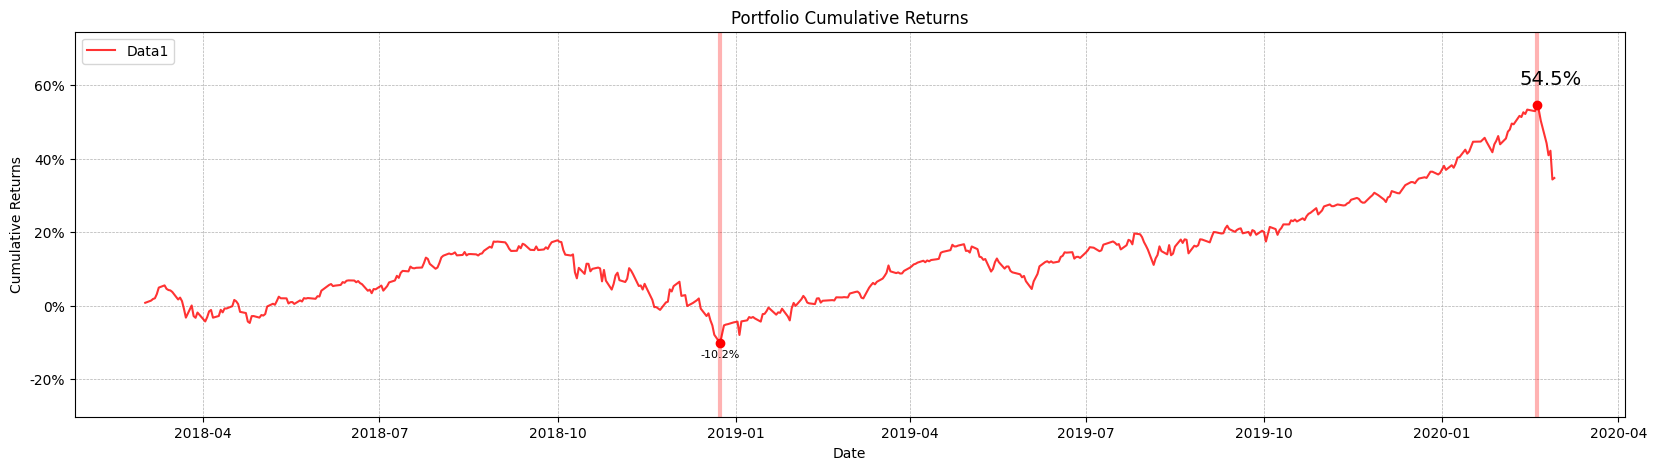

In [18]:
'''
Class에 할당할 parameter들을 먼저 정의해줍니다.
투자할 종목 유니버스의 데이터 + 투자 기간 + 초기 투자 금액
3가지 파라미터를 정의합니다.
'''

# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2018-03-01','2020-03-01')

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
osj_setting = Base_setting(data=data,investment_period=i_p,initial_investment=inv)
csy_setting = Base_setting(data,i_p,inv)

# 나 이렇게 살거임!
weight =    {'AAPL' : 0.2,
            'GOOG' : 0.2,
            'PEP' : 0.2,
            'KO' : 0.1,
            'MSFT' : 0.1,
            'NVDA' : 0.1,
            'AMZN' : 0.1
            }

# 비중 계산 확인
check_weight_error(weight)

# 투자 기간 동안 buy_and_hold 실시한 결과
buy_and_hold_port_return = csy_setting.run_all(weight)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_return(df_spy)

#Quiz, 왜 bench_mark 데이터는 데이터,투자기간,초기투자금을 정의해서 입력하지 않아도 실행이 될까?

# 비교해서 퍼포먼스를 나타내는 시각화 파일
#visualize(buy_and_hold_port_return,bench_return)

# 혼자 보기
vs3(buy_and_hold_port_return)


### What if? by momemtum strategy

Nice allocation
Nice allocation
Nice allocation


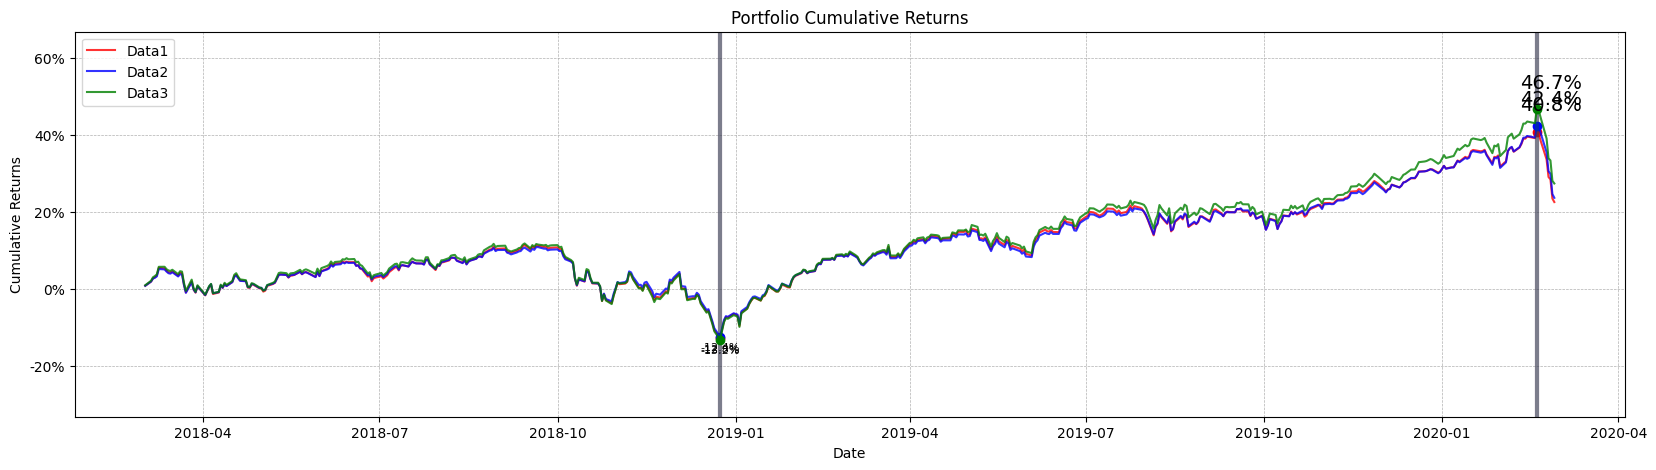

In [20]:
# # 투자 유니버스 가격 데이터
# data = df_price.copy()

# # investment_period = i_p :백테스팅할 투자 기간
# i_p = ('2018-05-01','2022-05-01')

# # initial_investment = 초기 투자 금액
# inv = 10000  # $

# # 객체 할당
# osj_setting = Base_setting(data=data,investment_period=i_p,initial_investment=inv)
# csy_setting = Base_setting(data,i_p,inv)

weight = csy_setting.strategy.momentum_vol_weighted(i_p,252)
weight2 = csy_setting.strategy.momentum_performance_quantile(i_p,252)
weight3 = csy_setting.strategy.momentum_performance_weigthed(i_p,252)

# 비중 계산 확인
check_weight_error(weight)
check_weight_error(weight2)
check_weight_error(weight3)

# 투자 기간 동안 buy_and_hold 실시한 결과
buy_and_hold_mom_port_return = csy_setting.run_all(weight)
buy_and_hold_mom_port_return2 = csy_setting.run_all(weight2)
buy_and_hold_mom_port_return3 = csy_setting.run_all(weight3)


# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs3(buy_and_hold_mom_port_return,buy_and_hold_mom_port_return2,buy_and_hold_mom_port_return3)


### your port vs momentum vs bench
투자기간의 결과를 반년마다 끊어서 시각화 합니다.

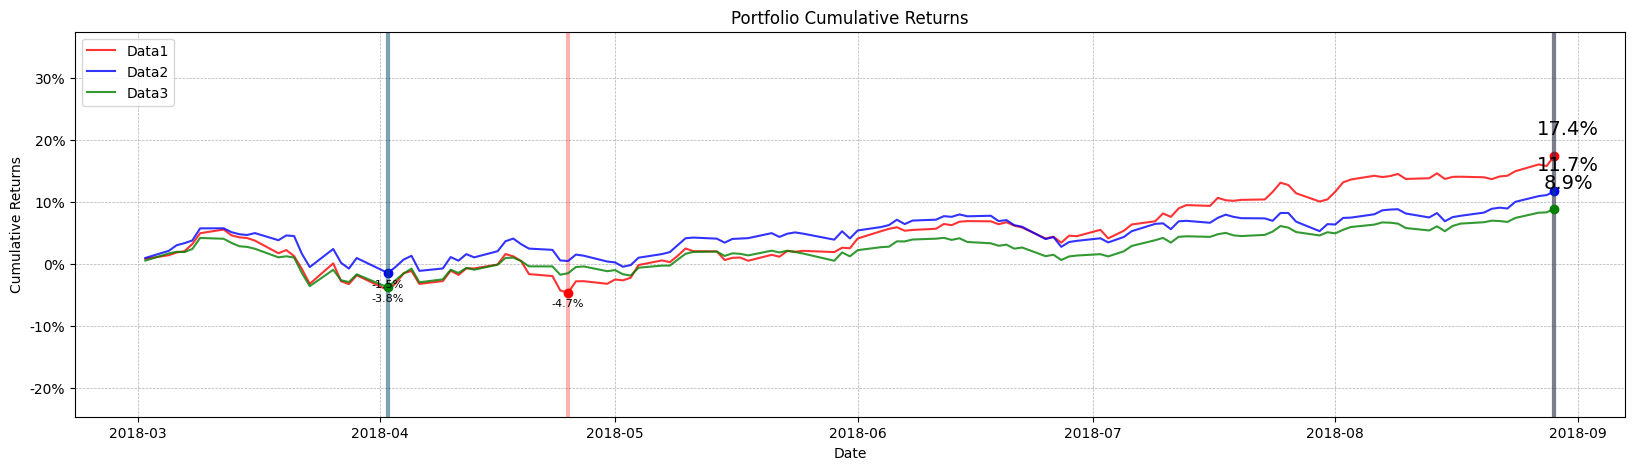

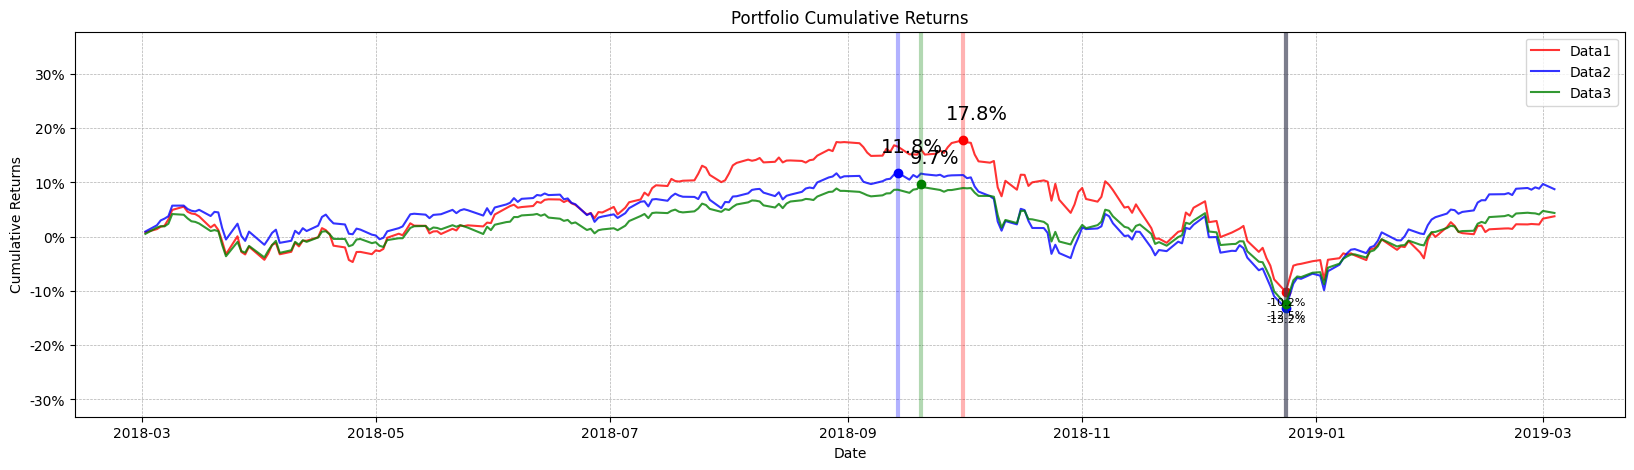

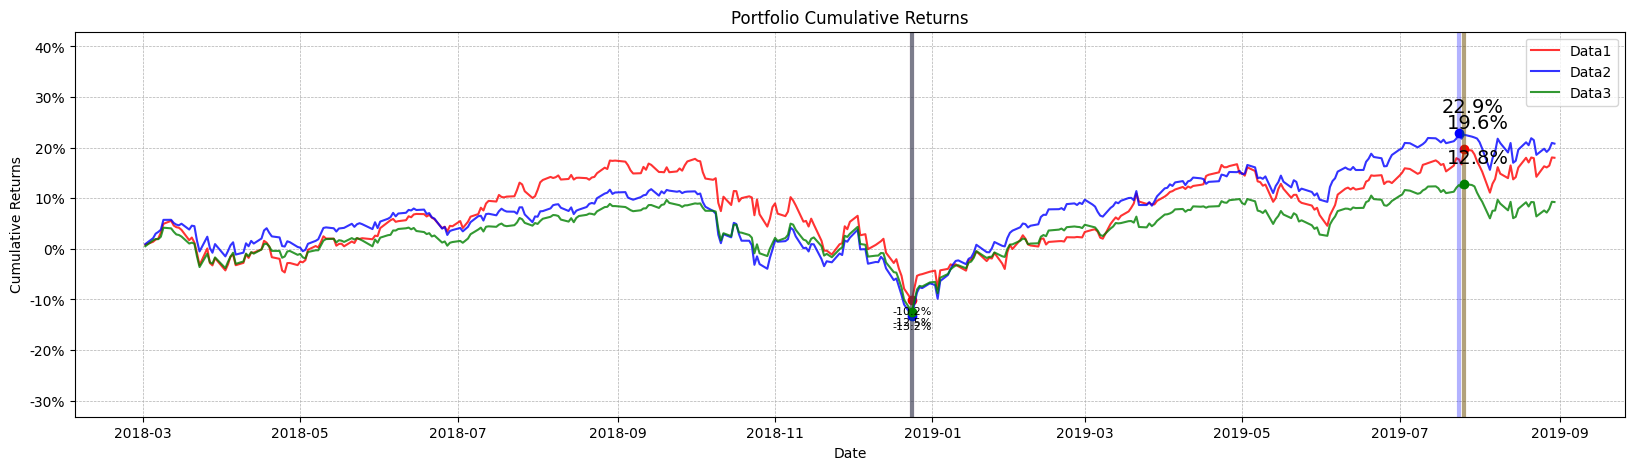

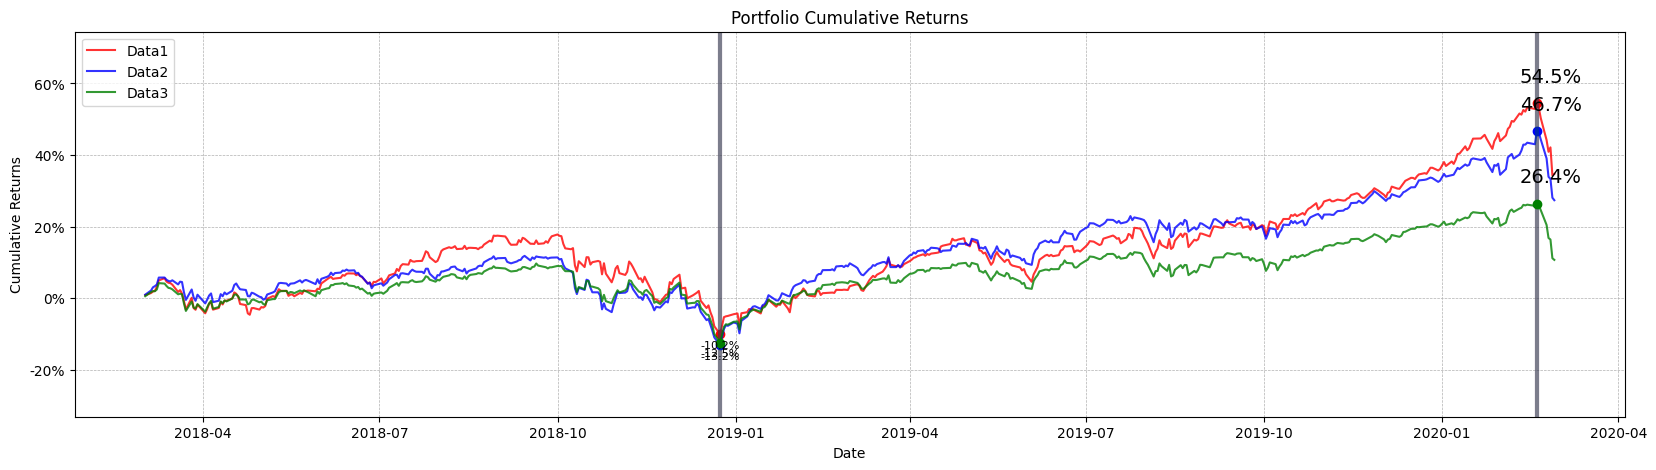

In [29]:
window = 126
times = 1
ans ='y'
while window*times < len(bench_return)+window :
    #ans = input('insert \'y\' to continue')
    if ans == 'y' :
        vs3(buy_and_hold_port_return.iloc[:times*126],
            buy_and_hold_mom_port_return3.iloc[:times*126],
            bench_return.iloc[:times*126])
        times += 1
    else:
        break


# Strategy : Momentum
- momentum_performance_weigthed
- momentum_performance_quantile
- momentum_vol_weighted



# Rebalancing by Algorithm

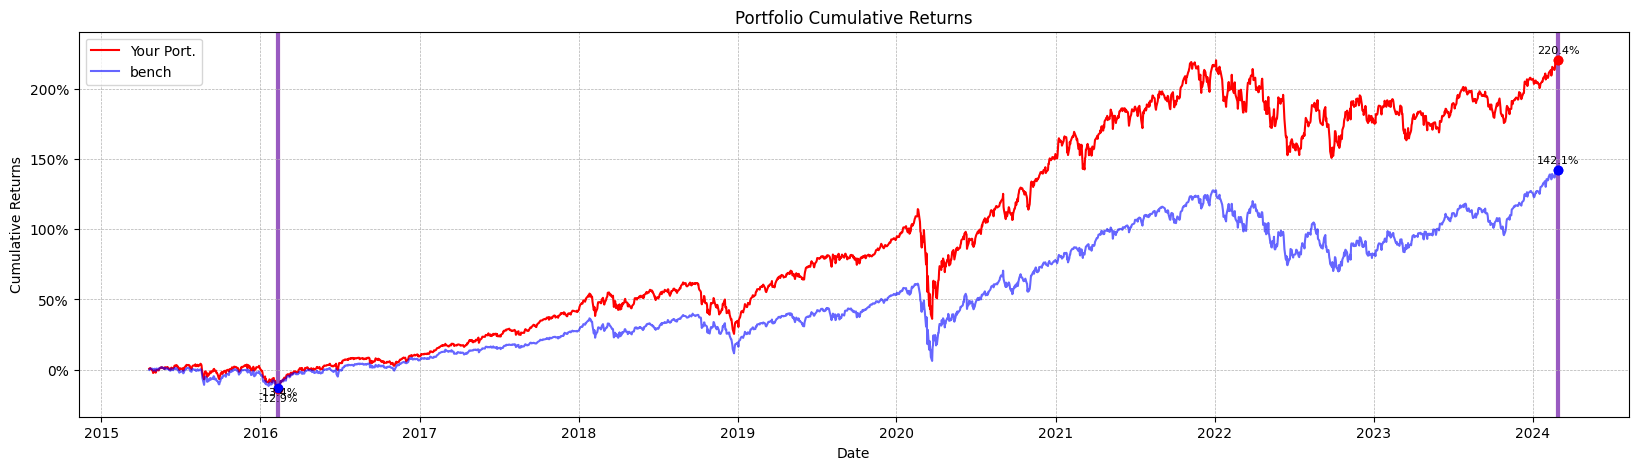

In [30]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-04-20','2016-04-20')

# 리밸런싱 기간
n = 252

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
csy_setting = Base_setting(data,i_p,inv)

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return = csy_setting.port_return(rebalanced_port)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_full_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
visualize(rebalanced_port_return,bench_return)


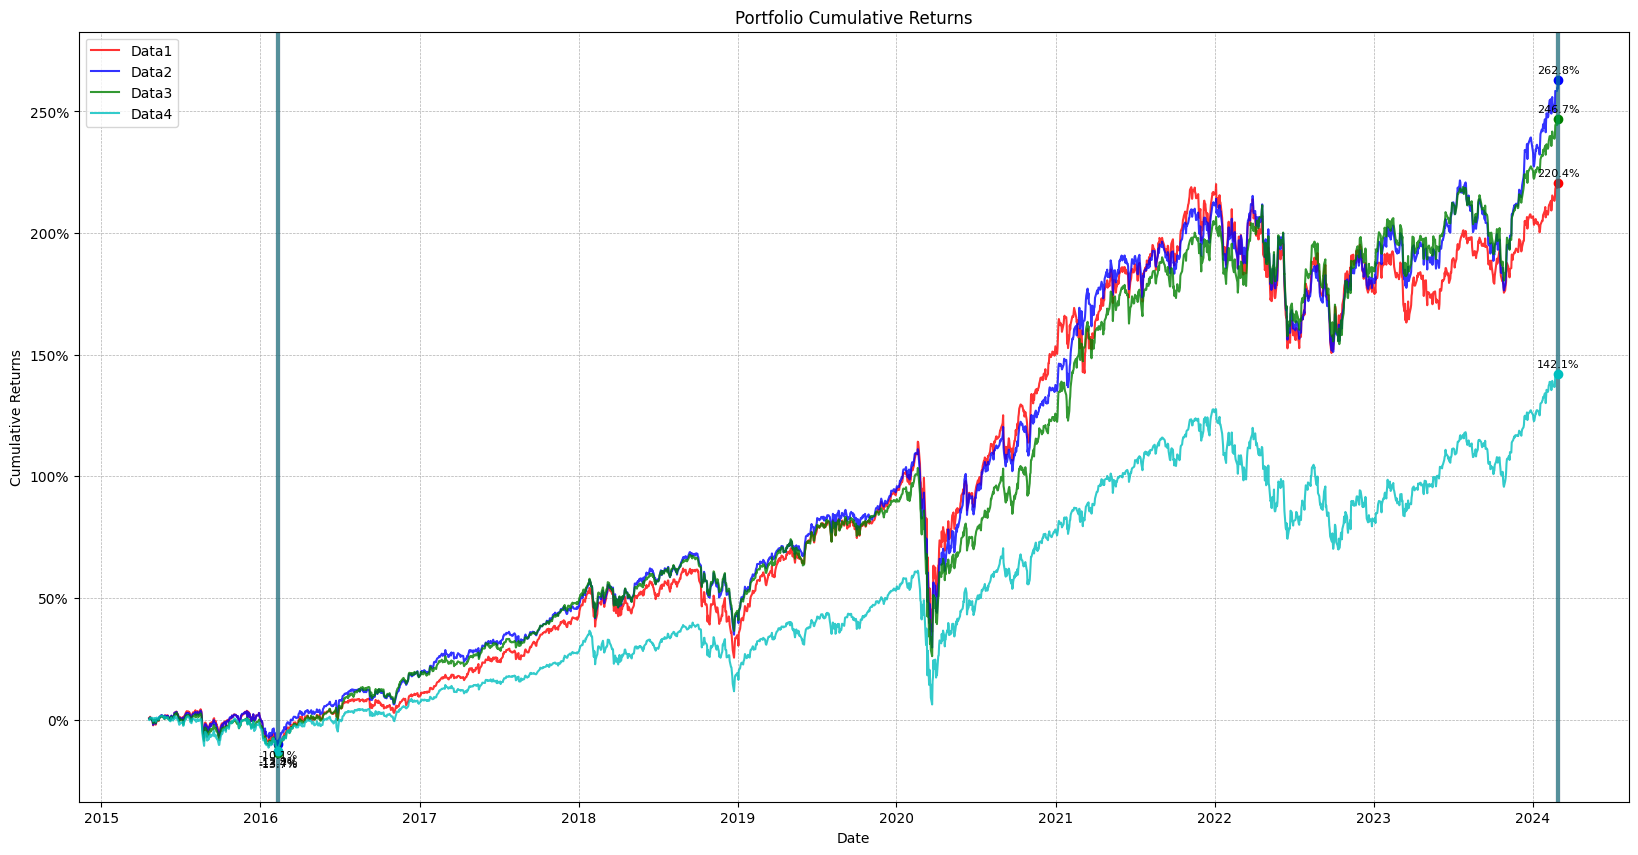

In [31]:
n = 121

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port2 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return2 = csy_setting.port_return(rebalanced_port2)

n = 60
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port3 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return3 = csy_setting.port_return(rebalanced_port3)


# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs2(rebalanced_port_return,rebalanced_port_return2,rebalanced_port_return3,bench_return)


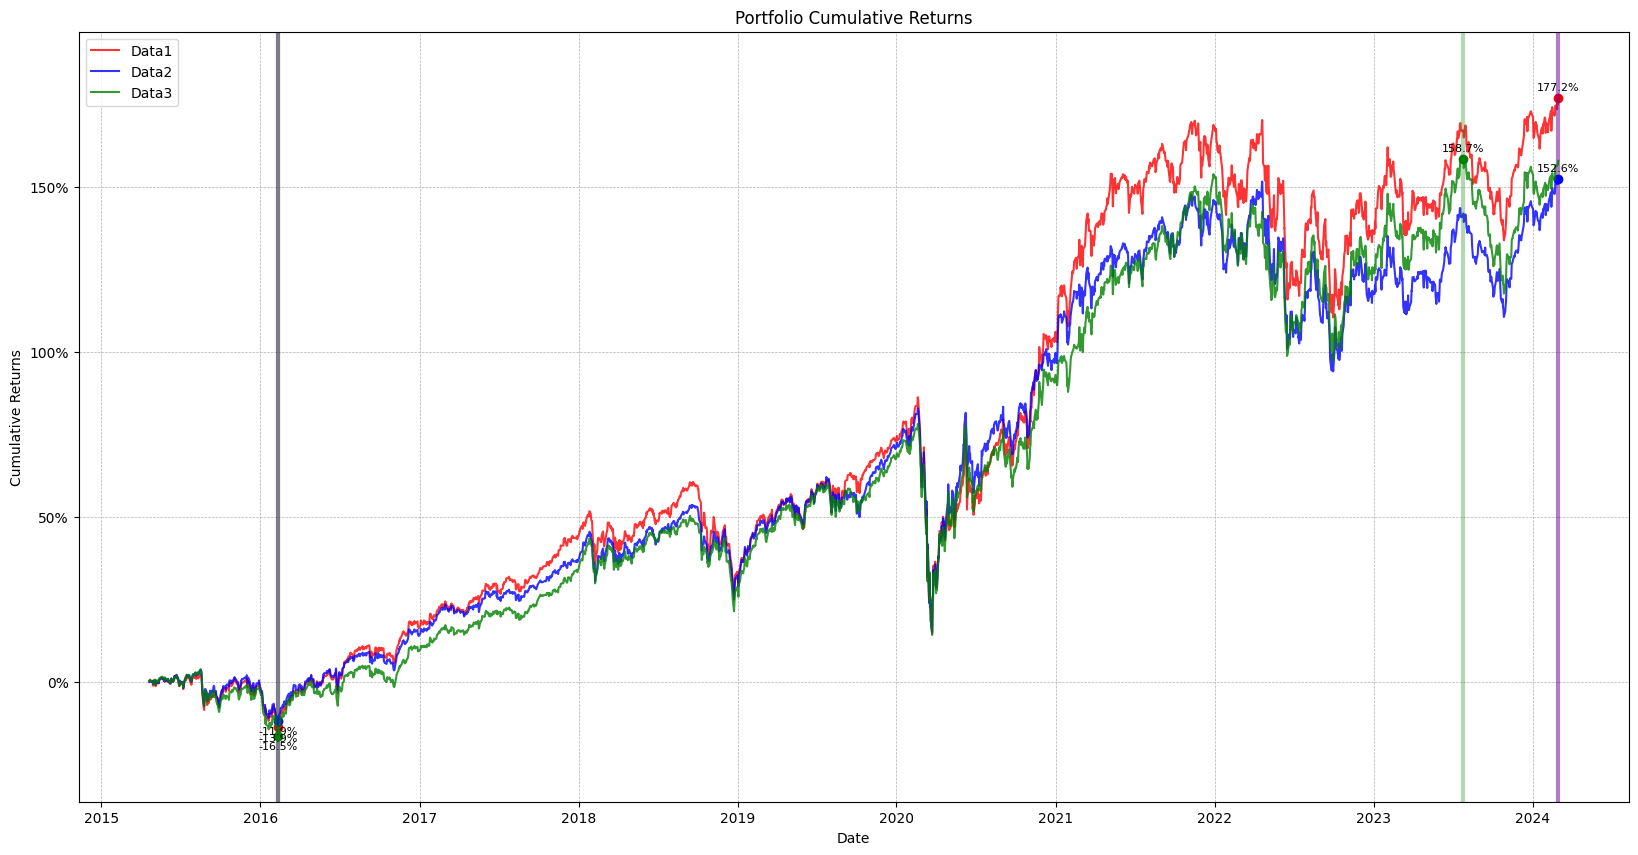

In [ ]:
n = 30

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port4 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return4 = csy_setting.port_return(rebalanced_port4)

n = 20
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port5 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return5 = csy_setting.port_return(rebalanced_port5)

n = 10
# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
rebalanced_port6 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
rebalanced_port_return6 = csy_setting.port_return(rebalanced_port6)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
vs2(rebalanced_port_return4,rebalanced_port_return5,rebalanced_port_return6)


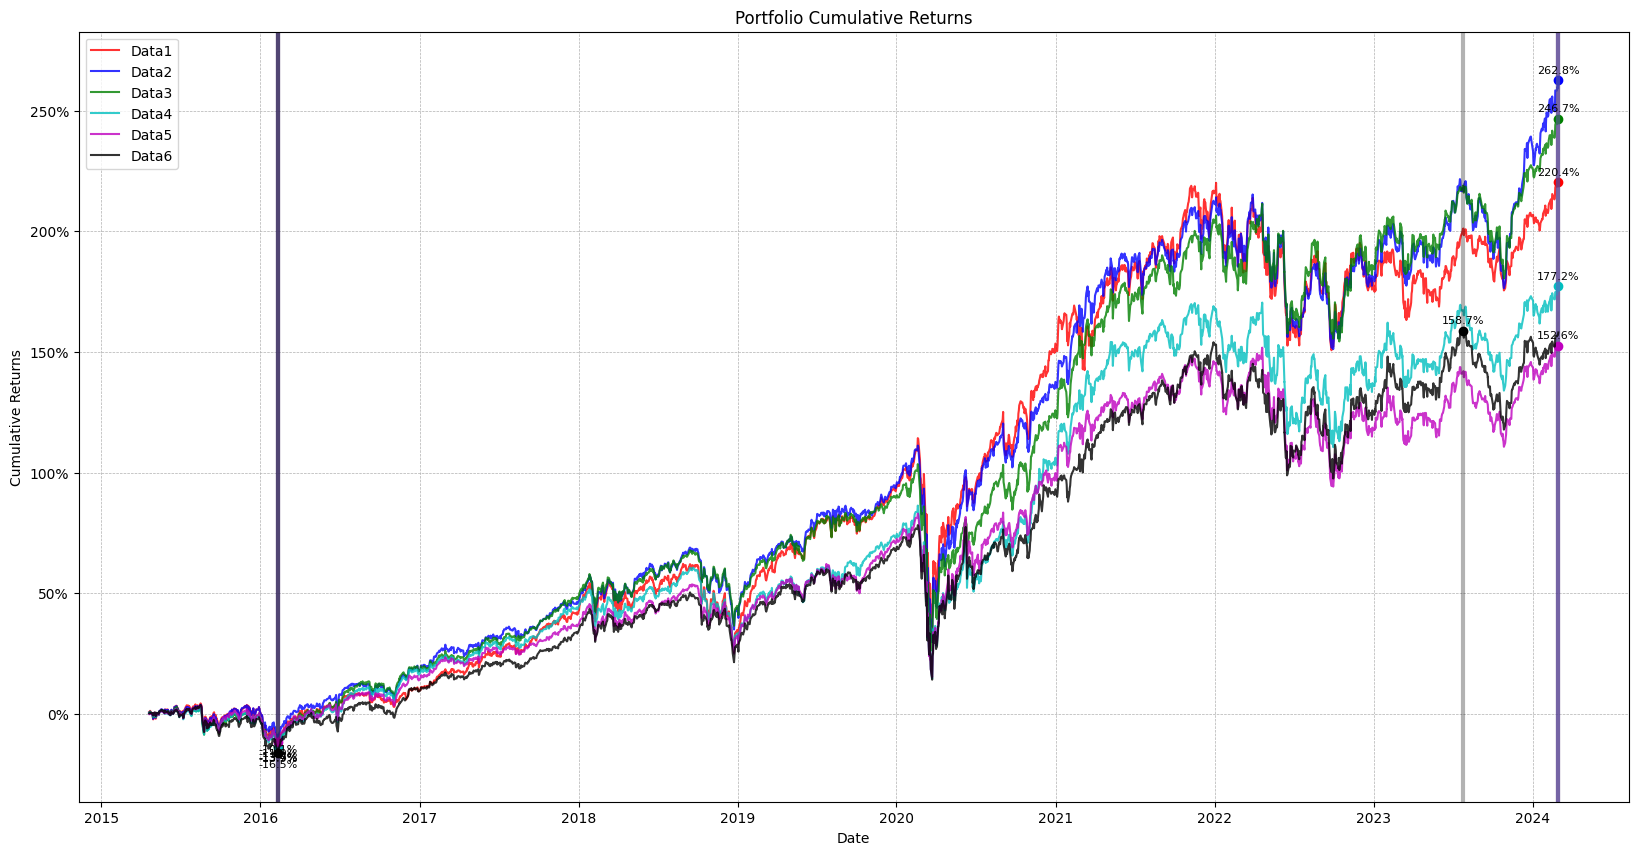

In [ ]:
vs2(rebalanced_port_return,rebalanced_port_return2,rebalanced_port_return3,rebalanced_port_return4,rebalanced_port_return5,rebalanced_port_return6)

## performance vs quantile vs vol_weighted comparing

In [32]:
n = 121
##Exapmle
# rebalanced_port2 = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_weigthed,window=n)
# rebalanced_port_return2 = csy_setting.port_return(rebalanced_port2)

# 아래 항목을 채워봅시다.
# per_port
# per_port_return

quan_port = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_performance_quantile,window=n)
quan_port_return = csy_setting.port_return(quan_port)

vol_port = csy_setting.algorithm_rebalancing(csy_setting.strategy.momentum_vol_weighted,window=n)
vol_port_return = csy_setting.port_return(vol_port)


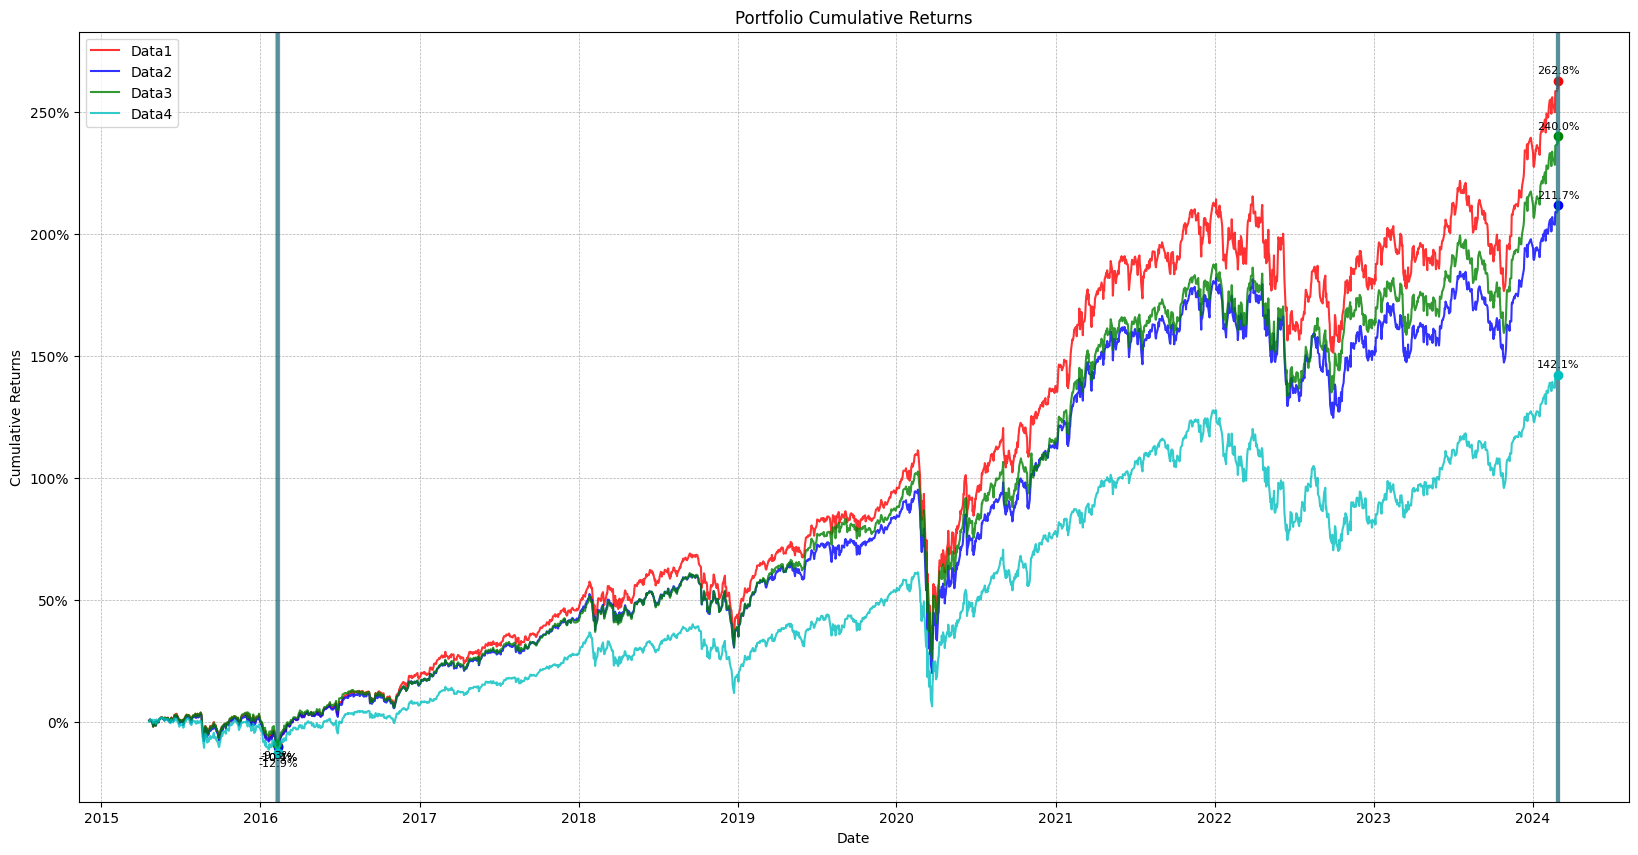

In [34]:
vs2(rebalanced_port_return2,quan_port_return,vol_port_return,bench_return)

# Rebalance by my hand

In [ ]:
# 투자 유니버스 가격 데이터
data = df_price.copy()

# investment_period = i_p :백테스팅할 투자 기간
i_p = ('2015-04-20','2016-04-20')

# 리밸런싱 기간
n = 121

# initial_investment = 초기 투자 금액
inv = 10000  # $

# 객체 할당
csy_setting = Base_setting(data,i_p,inv)

# 투자기간 시작점 부터, 기간 끝까지 rule based rebalance
#rebalanced_port = csy_setting.by_hand_rebalancing(window=n)

# 나 이렇게 살거임!
'''
{'AAPL' : 0.2,
'GOOG' : 0.2,
'PEP' : 0.2,
'KO' : 0.1,
'MSFT' : 0.1,
'NVDA' : 0.1,
'AMZN' : 0.1
}
'''
#rebalanced_port_return = csy_setting.port_return(rebalanced_port)

#비교할 벤치마크 수익률 계산
bench_return = csy_setting.benchmark_full_return(df_spy)

# 비교해서 퍼포먼스를 나타내는 시각화 파일
#visualize(rebalanced_port_return,bench_return)


# For your quiz.
사후과제 실행코드 입니다.

Nice allocation


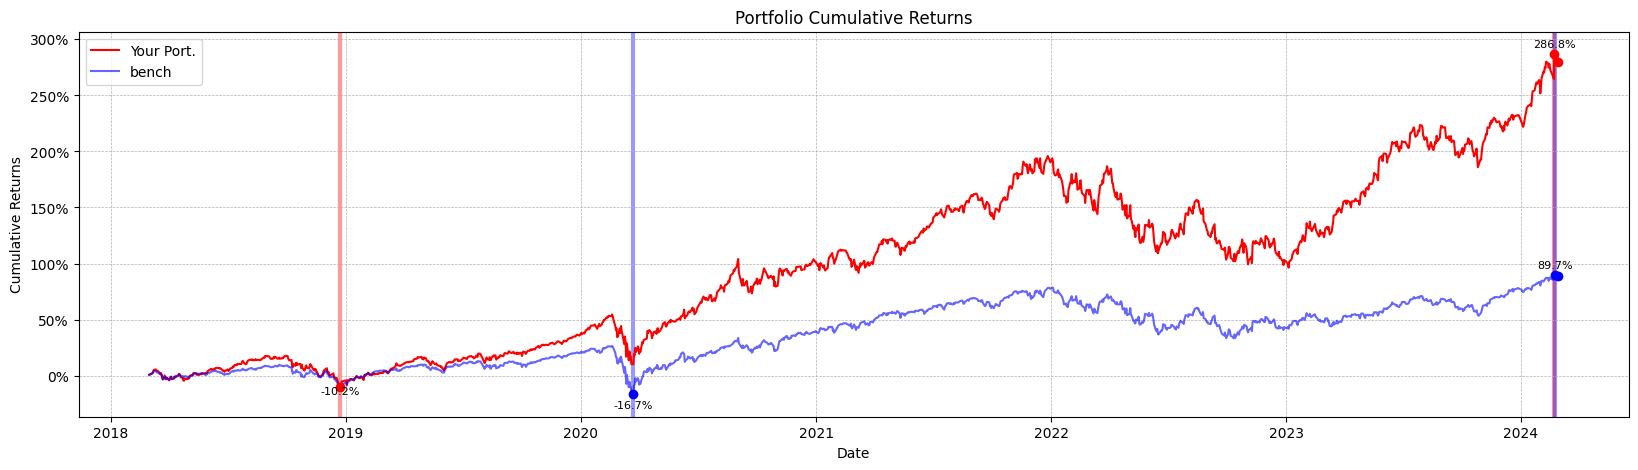

In [37]:
#
data = df_price.copy()

#
i_p = ('2018-03-01','2024-02-28')

#
inv = 10000  # $

#
your_setting = Base_setting(data,i_p,inv)

# 본인이 투자하고자 했던, 투자 종목과 비중을 작성한 후에 실행하세요
weight =    {'AAPL' : 0.2,
            'GOOG' : 0.2,
            'PEP' : 0.2,
            'KO' : 0.1,
            'MSFT' : 0.1,
            'NVDA' : 0.1,
            'AMZN' : 0.1
            }

#
check_weight_error(weight)

#
quiz_port_return = your_setting.run_all(weight)

#
bench_return = your_setting.benchmark_return(df_spy)

#
visualize(quiz_port_return,bench_return)



# Performance comparing

In [ ]:
from performance import *

In [ ]:
total_value_series = rebalanced_port['Total_value']
cagr = calculate_cagr(total_value_series)
mdd = calculate_mdd(total_value_series)
total_return_serires = rebalanced_port_return['Total_return']
sharpe = calculate_sharpe_ratio(total_return_serires,df_rf=df_rf)

In [ ]:
performance_dict = {'CAGR' : cagr,
                    'MDD' : mdd[0],
                    'SHARPE' : sum([item[2] for item in sharpe])/len([item[2] for item in sharpe])}

perform = pd.DataFrame(index=(0,1),data=performance_dict)

perform